In [1]:
import numpy as np
import pandas as pd
import math
import warnings
import matplotlib.pyplot as graph
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Data1.csv")
data = data.drop('Unnamed: 0', axis = 1)

In [3]:
data

,0,1,2
0,-0.744863,-0.914015,-1.815700
1,0.039325,1.064930,-1.587150
2,-0.407660,0.397869,-1.909981
3,0.033789,0.967298,-1.014872
4,-0.179156,0.695176,-1.491172
...,...,...,...
1995,0.398439,-0.292394,1.984417
1996,0.990135,0.141825,2.818675
1997,0.238568,-0.284869,1.386192
1998,-0.006532,-0.993170,1.481348


In [27]:
#defining sigmoidal function
def sigmoidal(x):
    y = 1/(1 + np.exp(-x))
    return y

#defining logistic function
def logistic_pdf(x):
    y = sigmoidal(x)(1 - sigmoidal(x))
    return y


#creating data matrix of givaen signals
def signal_data_matrix(data):
    X = []
    for i in range(len(data)):
        a = []
        for j in range(len(data.columns)):
            a.append(data.iloc[i][j])
        X.append(a)
    return np.matrix(X)

#defining Frobenius norm
def Frobenius_norm(A):
    A = np.array(A)
    x = 0
    for i in range(len(A)):
        for j in range(len(A[0])):
            x += A[i][j]**2
    return math.sqrt(x)

# def whiten(X):
#     # Calculate the covariance matrix
#     coVarM = np.cov(np.array(X)) 
    
#     # Single value decoposition
#     U, S, V = np.linalg.svd(coVarM)
    
#     # Calculate diagonal matrix of eigenvalues
#     d = np.diag(1.0 / np.sqrt(S)) 
    
#     # Calculate whitening matrix
#     whiteM = np.dot(U, np.dot(d, U.T))
    
#     # Project onto whitening matrix
#     Xw = np.dot(whiteM, X) 
    
#     return Xw, whiteM



        

def ICAS(data,alpha):
    X = signal_data_matrix(data)

    m = np.mean(np.array(X),axis = 0)
    data1 = data
    for i in range(len(data)):
        data1.iloc[i] = data1.iloc[i] - m
    X = signal_data_matrix(data1)

    # X , w = whiten(X)

    # X = np.matrix(X)
    
    #initialize the matrix
    W_new = np.matrix(0.1*np.eye(len(X.T)))

    W_old = W_new + 1
    # print(W_old)
    # print(W_new)
    t = 0
    # while Frobenius_norm(W_new - W_old)>1e-3:
    for k in range(600):
        W_old = W_new
        # print(W_old)
        t += 1
        # print(t)

        for i in range(len(X)):
            lis = []
            for j in range(len(X.T)):
                lis.append(1 - 2*sigmoidal(float(np.matmul(W_old[j],X[i].T))))
            lis = np.matrix(lis).T
            W_new = W_old + alpha*(np.matmul(lis,X[i]) + np.linalg.inv(W_old.T))
        # print(W_new-W_old)
    return np.matmul(W_new,X.T).T
    

    


[[-0.01297535  0.02630837 -0.70992865]
 [ 0.22215145  1.46729129 -1.42929936]
 [ 0.0485056   1.10698376 -1.2921928 ]
 ...
 [-0.207692   -0.78235544  0.83664285]
 [-0.3125776  -1.36851512  1.19612956]
 [-0.61169702 -0.74430181 -1.10330785]]


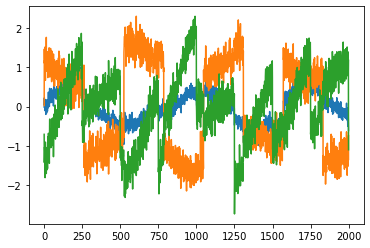

In [28]:
Z = ICAS(data,0.001)
print(Z)
# print(X)
x = np.array([float(i) for i in Z[:,0]]).T
y = np.array([float(i) for i in Z[:,1]]).T
z = np.array([float(i) for i in Z[:,2]]).T
graph.plot([i for i in range(len(x))],x)
graph.plot([i for i in range(len(y))],y)
graph.plot([i for i in range(len(z))],z)

In [ ]:
m = np.mean(np.array(X),axis = 0)
data1 = data
for i in range(len(data)):
    data1.iloc[i] = data1.iloc[i] - m
data1

In [ ]:
X = signal_data_matrix(data)
x = np.array([float(i) for i in X[:,0]]).T
y = np.array([float(i) for i in X[:,1]]).T
z = np.array([float(i) for i in X[:,2]]).T
graph.plot([i for i in range(len(x))],x)
graph.plot([i for i in range(len(y))],y)
graph.plot([i for i in range(len(z))],z)
z

In [ ]:
Z = ICA(data1,0.001)
x = np.array([float(i) for i in Z[:,0]]).T
y = np.array([float(i) for i in Z[:,1]]).T
z = np.array([float(i) for i in Z[:,2]]).T
graph.plot([i for i in range(len(x))],x)
graph.plot([i for i in range(len(y))],y)
graph.plot([i for i in range(len(z))],z)


In [ ]:
X = signal_data_matrix(data)
x = np.array([float(i) for i in X[:,0]]).T
y = np.array([float(i) for i in X[:,1]]).T
z = np.array([float(i) for i in X[:,2]]).T
graph.plot([i for i in range(len(x))],x)
graph.plot([i for i in range(len(y))],y)
graph.plot([i for i in range(len(z))],z)
z

In [18]:
from sklearn.decomposition import FastICA
X = signal_data_matrix(data)
transformer = FastICA(n_components=3, random_state=0,whiten='unit-variance')
X_transformed = transformer.fit_transform(np.array(X))
X_transformed.shape

(2000, 3)

In [19]:
X_transformed

array([[ 0.39361241, -1.28656664,  0.00297646],
       [ 0.49061271, -1.85044943,  1.25827346],
       [ 0.14879342, -1.59142474,  0.87470119],
       ...,
       [-0.57696593,  1.28037534, -0.7235827 ],
       [-0.68674074,  1.65102429, -1.23885345],
       [-0.58272629, -1.62727775, -0.96359159]])

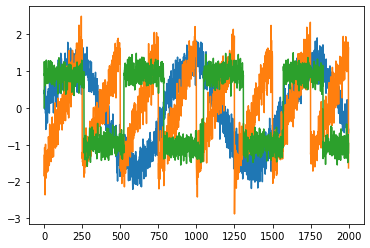

In [20]:
x = np.array([float(i) for i in X_transformed[:,0]]).T
y = np.array([float(i) for i in X_transformed[:,1]]).T
z = np.array([float(i) for i in X_transformed[:,2]]).T
graph.plot([i for i in range(len(x))],x)
graph.plot([i for i in range(len(y))],y)
graph.plot([i for i in range(len(z))],z)